In [47]:
import geopandas as gpd
import osmnx as ox
import folium
from shapely.geometry import box
from pathlib import Path
import yaml
import h3

In [48]:
# get path to project root directory
project_root = Path.cwd().parents[0]

# build path to yaml config file
config_path = project_root / "configs"/"paths.yaml"

In [49]:
# load yaml file into python dictionary
with open(config_path) as f:
    paths = yaml.safe_load(f)

paths

{'data': {'external': 'data/external',
  'raw': 'data/raw',
  'processed': 'data/processed',
  'results': 'results'},
 'outputs': {'dynamic_maps': 'outputs/maps/dynamic',
  'static_maps': 'output/maps/static',
  'figures': 'output/figures',
  'tables': 'outputs/tables'}}

In [50]:
# build data directory using paths from yaml config
data_external = project_root / paths["data"]["external"]

# finally build path to our geojson file
settlements_path = data_external / "UNHCR_poc_boundaries-Uganda_attributed.geojson"

In [51]:
# build output directory for maps using paths from the yaml config
maps_dir = project_root/paths['outputs']['dynamic_maps']
maps_dir.mkdir(parents=True, exist_ok = True)

# build output directory for osm data from the yaml config
output_dir = project_root / paths['data']['processed']
output_dir.mkdir(exist_ok=True)

In [52]:
# load settlements into a gdf
settlements = gpd.read_file(settlements_path)

# inspect settlements gdf
settlements.head(1)

name  objectid       pcode iso3   name_2 name_alt  loc_type loc_subtype  \
0  Ayilo 1    3441.0  UGAs004662  UGA  Ayilo 1     None      35.0         ***   

     createdate         createby  ... source  unhcr_assist     footnote  \
0  1.401667e+12  orand@unhcr.org  ...  UNHCR           1.0  RE-2013-SSD   

       comments  status                                globalid       lat  \
0  Northern UGA     1.0  {FD926792-2F62-48EE-8150-21AB071AAF91}  3.296111   

         lon   date_str                                           geometry  
0  31.934722 2014-06-01  MULTIPOLYGON (((31.93172 3.30525, 31.93109 3.3...  

[1 rows x 23 columns]

In [53]:

simple_settlements = (settlements.sort_values('date_str', ascending = False)
               .drop_duplicates(subset='name', keep = 'first')
               .reset_index(drop = True)
               ).reset_index(names = 'id')
simple_settlements['date_str'] = simple_settlements['date_str'].astype(str)

# simple_settlements = simple_settlements.drop(
#     columns=simple_settlements.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
# )

simple_settlements = simple_settlements.to_crs(crs = 'EPSG:32636')

<Axes: >

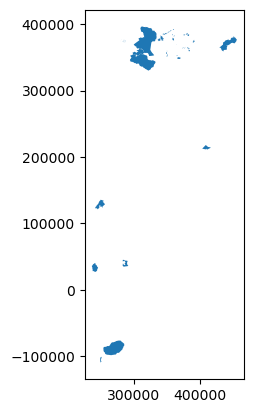

In [54]:
simple_settlements.plot()

In [62]:
simple_settlements

id         name  objectid       pcode  iso3             name_2 name_alt  \
0    0      Palabek   27594.0  UGAs032271   UGA         Palabek RC     None   
1    1        Rhino   26820.0  UGAs032256   UGA           Omugo RC     None   
2    2       Imvepi     168.0  UGAs990098   UGA          Imvepi RC     None   
3    3     Bidibidi   21261.0  UGAs027216   UGA           Bidibidi     None   
4    4     Pagrinya   20314.0  UGAs004684   UGA           Pagrinya     None   
5    5    Mungula I   12606.0  UGAs004680   UGA            Mungula     None   
6    6      Ayilo 1    3441.0  UGAs004662   UGA            Ayilo 1     None   
7    7      Ayilo 2    4758.0  UGAs004661   UGA            Ayilo 2     None   
8    8     Nyumanzi    3515.0  UGAs004664   UGA           Nyumanzi     None   
9    9       Boroli    3475.0  UGAs004663   UGA  Boroli Settlement     None   
10  10     Kyaka II    3585.0  UGAs002986   UGA           Kyaka II     None   
11  11     Nakivale    4258.0  UGAs001945   UGA           Nakivale     None   
12  12       Olua 1      21.0  UGAs001848   UGA             Olua 1     None   
13  13    Maaji III    2516.0  UGAs002612   UGA          Maaji III     None   
14  14     Maaji II    2696.0  UGAs002611   UGA           Maaji II     None   
15  15    Mungula 2     375.0  UGAs001854   UGA          Mungula 2     None   
16  16      Mirieyi    2371.0  UGAs001598   UGA            Mirieyi     None   
17  17     Baratuku    3929.0  UGAs001954   UGA           Baratuku     None   
18  18        Elema     178.0  UGAs001836   UGA              Elema     None   
19  19        Oliji     580.0  UGAs001956   UGA              Oliji     None   
20  20     Alere II    2505.0  UGAs001953   UGA           Alere II     None   
21  21        Agojo    2503.0  UGAs001951   UGA              Agojo     None   
22  22      Maaji I       NaN        None  None               None     None   
23  23    Oruchinga       NaN        None  None               None     None   
24  24    Palorinya       NaN        None  None               None     None   
25  25       Lobule       NaN        None  None               None     None   
26  26  Kiryandongo       NaN        None  None               None     None   
27  27       Olua 2       NaN        None  None               None     None   
28  28    Rwamwanja   27588.0  UGAs032267   UGA          Mahani RC     None   
29  29     Kyagwali       NaN        None  None               None     None   

    loc_type loc_subtype    createdate  ... source unhcr_assist     footnote  \
0       37.0        None  1.541376e+12  ...  UNHCR          1.0         None   
1       37.0         ***  1.524182e+12  ...  UNHCR          1.0  RE-2013-SSD   
2       37.0         ***  1.490746e+12  ...  UNHCR          NaN         None   
3       35.0         ***  1.476144e+12  ...  UNHCR          NaN                
4       35.0         ***  1.472170e+12  ...  UNHCR          1.0         None   
5       35.0         ***  1.431994e+12  ...  UNHCR          NaN  RE-2013-SSD   
6       35.0         ***  1.401667e+12  ...  UNHCR          1.0  RE-2013-SSD   
7       35.0         ***  1.401667e+12  ...  UNHCR          1.0  RE-2013-SSD   
8       35.0         ***  1.401667e+12  ...  UNHCR          1.0  RE-2013-SSD   
9       35.0         ***  1.401667e+12  ...  UNHCR          1.0  RE-2013-SSD   
10      35.0         ***  1.109722e+12  ...  UNHCR          1.0         None   
11      35.0         ***  1.068077e+12  ...  UNHCR          1.0     NAKIVALE   
12      35.0         ***  8.862912e+11  ...  UNHCR          NaN  RE-2013-SSD   
13      35.0         ***  8.677152e+11  ...  UNHCR          NaN  RE-2013-SSD   
14      35.0         ***  8.677152e+11  ...  UNHCR          NaN  RE-2013-SSD   
15      35.0         ***  8.415360e+11  ...  UNHCR          NaN     Adjumani   
16      35.0         ***  7.573824e+11  ...  UNHCR          NaN  RE-2013-SSD   
17      35.0         ***  6.969024e+11  ...  UNHCR          1.0  RE-2013-SSD   
18      35.0         ***  6.942240

In [56]:
simple_settlements.to_file(output_dir/"UNHCR_poc_boundaries-Uganda_attributed_deduped.geojson", driver="GeoJSON")

In [57]:
from math import sqrt
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point



def make_hex_grid(polygon, hex_area):
    """
    Creates hexbins for a polygon. Hexbins are draped over the polygon, NOT clipped to its extent.
    """
    # Project to meters
    minx, miny, maxx, maxy = polygon.bounds

    # Derive side length from area
    s = sqrt((2 * hex_area) / (3 * sqrt(3)))
    w = 2 * s
    h = sqrt(3) * s

    dx = 3/2 * s
    dy = h

    # Generate grid of hex centers
    cols = np.arange(minx - w, maxx + w, dx)
    rows = np.arange(miny - h, maxy + h, dy)

    poly_buffered = polygon.buffer(s)
    hexes = []
    for i, x in enumerate(cols):
        for j, y in enumerate(rows):
            # Stagger every other column by half the height
            y_offset = y + (dy / 2 if i % 2 else 0)
            center = Point(x, y_offset)

            # Compute vertices
            if poly_buffered.contains(center):
                vertices = [
                    (x + s * np.cos(np.deg2rad(angle)),
                    y_offset + s * np.sin(np.deg2rad(angle)))
                    for angle in np.arange(0, 360, 60)
                ]
                hexes.append(Polygon(vertices))

    return hexes

In [58]:
def make_hex_grid_by_polygon(gdf, hex_area):
    """
    Iterate over each polygon in a GeoDataFrame and
    create a complete-hex grid for each one.
    """
    if gdf.crs is None:
        raise ValueError("Input GeoDataFrame has no CRS defined. Please set a projected CRS before using this function.")
    
    # Check for geographic CRS (degrees)
    if gdf.crs.is_geographic:
        raise ValueError(
            f"Input CRS {gdf.crs.to_string()} is geographic (degrees). "
            "Please reproject to a projected CRS (e.g., UTM) before generating hex grids."
        )

    all_hexes = []
    ids = []

    for idx, row in gdf.iterrows():
        polygon = row.geometry
        hexes = make_hex_grid(polygon, hex_area)
        all_hexes.extend(hexes)
        ids.extend([idx] * len(hexes))

    hex_gdf = gpd.GeoDataFrame({"poly_id": ids, "geometry": all_hexes}, crs=gdf.crs)
    return hex_gdf

In [59]:
areas = [250000, 62500, 15625]  # in square meters

hex_250k = make_hex_grid_by_polygon(simple_settlements, areas[0])
hex_62k  = make_hex_grid_by_polygon(simple_settlements, areas[1])
hex_15k  = make_hex_grid_by_polygon(simple_settlements, areas[2])

hex_250k.to_file(output_dir/"hexbins_250k_lcluc_v5.geojson", driver="GeoJSON")
hex_62k.to_file(output_dir/"hexbins_62k_lcluc_v5.geojson", driver="GeoJSON")
hex_15k.to_file(output_dir/"hexbins_15k_lcluc_v5.geojson", driver="GeoJSON")

In [69]:
hex_250k.groupby('poly_id').nunique().sort_values(by = 'geometry' ,ascending = True)

geometry
poly_id          
16              3
27              6
12              7
22              8
20             11
9              12
5              13
19             13
17             16
7              23
13             23
18             25
14             26
8              35
6              39
4              40
25             41
21             44
15             58
23             70
26            206
10            240
24            279
28            362
29            459
2             467
0             958
11           1945
1            2272
3            3367

In [60]:
# Start map centered roughly on Uganda
m = folium.Map(location=[1.3733, 32.2903], zoom_start=8, tiles="CartoDB positron")

# Add settlements (outlines)
folium.GeoJson(
    simple_settlements,
    name="Settlements",
    style_function=lambda x: {
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.1
    },
    tooltip=folium.GeoJsonTooltip(fields=simple_settlements.columns[:1].tolist())
).add_to(m)

# Add hex layers by scale
colors = {
    "250k m²": "red",
    "62.5k m²": "blue",
    "15.6k m²": "green"
}

folium.GeoJson(
    hex_250k,
    name="Hexbins",
    style_function=lambda x: {
        "color": "red",
        "weight": 1,
        "fillOpacity": 0.2,
        "fillColor": "black"
        }
        # tooltip=folium.GeoJsonTooltip(fields=hex_250k.columns[:1].tolist())
    ).add_to(m)

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# Save or display map
m.save(maps_dir/"hexbins_settlements_map_v5.html")
m